# Pràctica Fifa 

Volem prediure *value* dels jugadors fent servir sa informació del jugador.

## Importam ses llibreries

El primer que farem es importar ses llibreries que farem servir.

In [1]:
import os

# Preprocessat i modelat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tractament de dades
import pandas as pd
import numpy as np

# Gràfics
import matplotlib.pyplot as plt
from matplotlib import style
# Ses gràfiques surten a sa mateixa pàgina en lloc d'apareixer a una altra finestra
%matplotlib inline

# Configuració del matplotlib
# Parametritzam també com és veuran, més groses i estil ggplot
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['figure.figsize']=(16,9)

## Llegim es fitxer fifa.csv

Llegim fifa.csv i ho carregam com un dataset ``df`` de ``pandas`` and an utility from the library
``os``.

Visualitzam a continuació ses primeres files


In [2]:
df = pd.read_csv(os.path.join("..", "in", "fifa.csv"))
df.head(15)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# Visualització de sa informació i es tamany que té

Veïm es tamany que té


In [3]:
df.shape

(18207, 89)

Com a no se veuen totes ses columnes li deïm que les volem veure totes

In [4]:
pd.set_option('display.max_columns', None)
df.head(15)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

Ens carregam ses dues primeres columnes que no es aporten res de informació 

In [5]:
# df = totes ses files i columnes desde sa 2 envant
df = df.iloc[:, 2:]
df

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,https://cdn.sofifa.org/players/

NOTA: A partir d'aquí faré feina amb una variable ``df_aux`` en comptes de ``df`` per si de cas hagués d'emprar ``df`` en sa seua versió més original
    
``df``: dataframe original sense ses dues primeres columnes

A partir d'aqui el nom del dataframe passa a ser ``df_aux`` 

### Ens carregam també columnes que no ens aportaran res de informació per s'aprenentatge o millor dit, no sé com tractar-les per treure-hi profit a s'hora de fer s'aprenentatge
Atributs: ``Photo``, ``Flag``, ``Club Logo``, ``Preferred Foot``, ``Body Type``, ``Real Face``, ``Jersey Number``consider que no ens aporten res

In [6]:
# entre cometes els camps que no vull i , axis=1 vol dir columnes, si fossin files seria axis=0
df_aux=df.drop(['Photo','Flag','Club Logo','Preferred Foot','Body Type','Real Face','Jersey Number'], axis=1)
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,Medium/ Medium,CM,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,Medium/ Medium,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,En

# Tractament dels NaN
### Miram quants de NaN tenen cada columna
Depenguent de si són poquets simplement eliminarem ses files, si són molts decidirem si omplim sa informació faltant o no considerarem aquest atribut a s'hora d'entrenar

Executarem una serie d'instruccions que ens permeti veure quantes columnes tenen dades nul.les, quines són i quanta informació li manca

Intencionadament no he definit cap funció o procediment per fer-ho i després anar-lo cridant. Encara desconec ses dades o sa informació que té i en es cas que hagi de personalitzar-lo/modificar-lo per a cada 'iteració' que l'hagi d'executar ho faré in-situ.

#### Com a millora
sí que un pic hagi acabat tota sa pràctica i em doni temps, puc definir sa crida al procedimient necessari i optimitzar es codi.

In [7]:
valors_nan_count = df_aux.isnull().sum(min_count=1)
valors_nan_count = valors_nan_count[valors_nan_count != 0]

print(f"Número de columnes amb dades nul·les: {valors_nan_count.shape[0]}")

if valors_nan_count.shape[0]:
    
    print("Recompte de valors nuls per columna: ")
    for name, valors_nuls in valors_nan_count.items():

        print(f"  - A la columna '{name}' li falten " f"{valors_nuls} dades.")

Número de columnes amb dades nul·les: 72
Recompte de valors nuls per columna: 
  - A la columna 'Club' li falten 241 dades.
  - A la columna 'International Reputation' li falten 48 dades.
  - A la columna 'Weak Foot' li falten 48 dades.
  - A la columna 'Skill Moves' li falten 48 dades.
  - A la columna 'Work Rate' li falten 48 dades.
  - A la columna 'Position' li falten 60 dades.
  - A la columna 'Joined' li falten 1553 dades.
  - A la columna 'Loaned From' li falten 16943 dades.
  - A la columna 'Contract Valid Until' li falten 289 dades.
  - A la columna 'Height' li falten 48 dades.
  - A la columna 'Weight' li falten 48 dades.
  - A la columna 'LS' li falten 2085 dades.
  - A la columna 'ST' li falten 2085 dades.
  - A la columna 'RS' li falten 2085 dades.
  - A la columna 'LW' li falten 2085 dades.
  - A la columna 'LF' li falten 2085 dades.
  - A la columna 'CF' li falten 2085 dades.
  - A la columna 'RF' li falten 2085 dades.
  - A la columna 'RW' li falten 2085 dades.
  - A la

Sa columna ``Loaned From`` que té valors ``NaN`` a pràcticament totes ses files i no val la pena omplir-la amb valors (i quins), seria enganar es model, idó ens la carregam també

In [8]:
df_aux = df_aux.drop(['Loaned From'], axis=1)
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,Medium/ Medium,CM,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,Medium/ Medium,ST,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,1

El reste de columnes tenen atributs que en major o menor mesura poden resultar rel.levants. 
Però encara tenc 71 columnes amb valors ``NaN``
Aleshores em permetre sa llicència que mentre no em passi del 5% dels jugadors (aprox. 910), els el.liminaré a fi de tenir sa informació més neta possible


Començaré amb sa primera columna: ``International Reputation`` amb 48 dades faltants (poquetes).

In [9]:
df_aux = df_aux.dropna(subset = ['International Reputation'])
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,Medium/ Medium,CM,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,Medium/ Medium,ST,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,1

Torn mirar ara quants em queden, i comprov que coincideixen ses mateixes dades de sa columna ``Internation Reputation`` amb els altres 41 atributs que li faltaven 48 dades.

Se veu que eren ses mateixes files i per tant, un pic feta s'operació anterior ens quedam amb 31 columnes amb dades nul.les. Veïem-ho:

In [10]:
valors_nan_count = df_aux.isnull().sum(min_count=1)
valors_nan_count = valors_nan_count[valors_nan_count != 0]

print(f"Número de columnes amb dades nul·les: {valors_nan_count.shape[0]}")
if valors_nan_count.shape[0]:
    print("Recompte de valors nuls per columna: ")
    for name, valors_nuls in valors_nan_count.items():

        print(f"  - A la columna '{name}' li falten " f"{valors_nuls} dades.")

Número de columnes amb dades nul·les: 31
Recompte de valors nuls per columna: 
  - A la columna 'Club' li falten 241 dades.
  - A la columna 'Position' li falten 12 dades.
  - A la columna 'Joined' li falten 1505 dades.
  - A la columna 'Contract Valid Until' li falten 241 dades.
  - A la columna 'LS' li falten 2037 dades.
  - A la columna 'ST' li falten 2037 dades.
  - A la columna 'RS' li falten 2037 dades.
  - A la columna 'LW' li falten 2037 dades.
  - A la columna 'LF' li falten 2037 dades.
  - A la columna 'CF' li falten 2037 dades.
  - A la columna 'RF' li falten 2037 dades.
  - A la columna 'RW' li falten 2037 dades.
  - A la columna 'LAM' li falten 2037 dades.
  - A la columna 'CAM' li falten 2037 dades.
  - A la columna 'RAM' li falten 2037 dades.
  - A la columna 'LM' li falten 2037 dades.
  - A la columna 'LCM' li falten 2037 dades.
  - A la columna 'CM' li falten 2037 dades.
  - A la columna 'RCM' li falten 2037 dades.
  - A la columna 'RM' li falten 2037 dades.
  - A la c

Apurant un poc més, ses columnes ``Club``, ``Position`` i ``Contract Valid Until`` tenen files amb dades que podem eliminar sense pasar-me de sa fita que m'he marcada del 5%


In [11]:
df_aux = df_aux.dropna(subset = ['Club', 'Position' , 'Contract Valid Until'])
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,Medium/ Medium,CM,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,Medium/ Medium,ST,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,1

I torn mirar ara quantes característiques ens queden per tractar.

In [12]:
valors_nan_count = df_aux.isnull().sum(min_count=1)
valors_nan_count = valors_nan_count[valors_nan_count != 0]

print(f"Número de columnes amb dades nul·les: {valors_nan_count.shape[0]}")
if valors_nan_count.shape[0]:
    print("Recompte de valors nuls per columna: ")
    for name, valors_nuls in valors_nan_count.items():

        print(f"  - A la columna '{name}' li falten " f"{valors_nuls} dades.")

Número de columnes amb dades nul·les: 28
Recompte de valors nuls per columna: 
  - A la columna 'Joined' li falten 1264 dades.
  - A la columna 'LS' li falten 1992 dades.
  - A la columna 'ST' li falten 1992 dades.
  - A la columna 'RS' li falten 1992 dades.
  - A la columna 'LW' li falten 1992 dades.
  - A la columna 'LF' li falten 1992 dades.
  - A la columna 'CF' li falten 1992 dades.
  - A la columna 'RF' li falten 1992 dades.
  - A la columna 'RW' li falten 1992 dades.
  - A la columna 'LAM' li falten 1992 dades.
  - A la columna 'CAM' li falten 1992 dades.
  - A la columna 'RAM' li falten 1992 dades.
  - A la columna 'LM' li falten 1992 dades.
  - A la columna 'LCM' li falten 1992 dades.
  - A la columna 'CM' li falten 1992 dades.
  - A la columna 'RCM' li falten 1992 dades.
  - A la columna 'RM' li falten 1992 dades.
  - A la columna 'LWB' li falten 1992 dades.
  - A la columna 'LDM' li falten 1992 dades.
  - A la columna 'CDM' li falten 1992 dades.
  - A la columna 'RDM' li fal

Podem apreciar que dels 18207 jugadors originals ens hem desfet d'un total 1,587% (289 jugadors) << 5% que m'havia marcat com a límit i m'ha deixat amb un total de 28 columnes amb valors NaN de ses 71 que teniem originalment.
D'aquestes columnes restants:
- Sa claúsula d'alliberació ``Release Clause`` és molt complicat omplir ses dades faltants. Fer una mitja de totes i posar-la com a valor seria falsetjar ses dades o si seria vàlid ses que tenen valors nuls col.locar-lis un 0€. Per tant, no la consideraré per s'entrenament.
- Sa columna ``Joined`` pot ser relllevant  però tampoc puc incorporar aquesta dada fàcilment, no em puc inventar dates ni incorporar informació que desconec. També l'exclouré.
- Ses 26 columnes que li manquen tantes dades són paràmetres pròpies dels jugadors que són porters ``GK (Goalkeeper)``. 
  Tot hi que de futbol, no tenc ni idea, a un foro de FIFA he trobat que pertanyen a ses ubicacions en es camp (es porter es a un únic lloc per contra de la resta que estan escampats). Es problema es que si he de considerar els porters o una de dues faig es tractament separadament de la resta o si els incloesc,
no puc tenir en compte aquests atributs. 

    - ``CB`` (CentralBack) - Defensa Central
    - ``LB`` (LeftBack) - Lateral Esquerre
    - ``RB`` (RightBack) - Lateral Dret
    - ``CDM`` (CentralDefensiveMidfielder) - Migcentral Defensiu
    - ``CAM`` (CentralAttackMidfielder) -Migcentral Ofensiu
    - ``LM`` (LeftMiddle) - Interior Esquerre
    - ``RM`` (RigthMiddle) - Interior Dret
    - ``LW`` Extrem Esquerre
    - ``RW`` Extrem Dret
    - ``LF`` - Segon Davanter Esquerre
    - ``RF`` - Segon Davanter Dret
    - ``RWB`` - Carriler Dret 
    - ``CM`` - Migcentral
    - ``CF`` Segon Davanter o Mitja Punta
    - ``ST`` (Striker) - Davanter Central
    - ``LWB`` - Carriler Esquerre
    - ..... La resta d'``atributs`` no he trobat que volien dir.
                                                                                             
 Aquestes 28 columnes les eliminaré del meu entrenament també.                                                                                           

In [13]:
columnes_descartades = ['Joined', 'Release Clause', 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
df_aux =df_aux.drop(columnes_descartades, axis=1)
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,Medium/ Medium,RF,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,High/ Low,ST,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,High/ Medium,LW,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,Medium/ Medium,GK,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,High/ High,RCM,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,Medium/ Medium,CM,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,Medium/ Medium,ST,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,1.0,3.0,2.0,Medium/ Medium,ST,2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,1.0,3.0,2.0,Medium/ Medium,RW,2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


### Altres atributs

Ara fixant-me en sa columna ``Work Rate``. De sa informació que he pogut aconseguir, he vist que:

Què són els WorkRates?

Traduït, Taxes de Feina i com de compromès està un jugador respecte a l'atac i defensa. 
Però aquests valors és mesuren depenguent de sa posició que tengui en es camp.
Es per tant que un jugador a una posició ``Position`` jugui millor que un altre a una altre posició ``Position`` amb els mateixos ``Work Rate``
Aquestes dues columnes ``Work Rate`` i ``Position`` actualment són tipus object i sa determinació d'un valor resultant en funció d'aquestes entrades trob una feina prou complicada per saber combinar tots els casos possibles així que:

D'aquestas dues columnes també m'en desfaré

In [14]:
df_aux =df_aux.drop(['Work Rate','Position'], axis=1)

# Tractament de ses dades
Per s'entrenament necessitaré ses meues dades amb un format numèric. A proves inicials que he anat fent, fins i tot me n'he adonat que els tipus datetime tampoc li agraden per entrenar. Així els tractament de dates acab convertint-les a numeric.

Primer, hem de veure de quin tipus són cadascuna de ses columnes

In [15]:
df_aux.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Special                       int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     

Començarem per s'altaria la passam a número i aprofitant, la convertim a cms i li camviam el nom de sa columna com ``Altaria`` (cms.)
Per fer això definirem una funció ``altaria_to_cms(x)`` i a continuació l'aplicarem a tota sa columna ``Height``

In [16]:
def altaria_to_cms(x):
    
    ## xepam els peus i ses polzades en dues subcadenes
    
    peusStr = x[:x.find("'")]
    polzadesStr = x[x.find("'") + 1:]
    
    ## les passam a números
    
    peus = float(peusStr)
    polzades = float(polzadesStr)
    
    ## les convertim a cms.
    
    cms = peus * 30.48 + polzades * 2.54
    
    return cms

In [17]:
df_aux["Height"] = df_aux["Height"].apply(altaria_to_cms)
df_aux = df_aux.rename(columns={"Height": "Altaria"})
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,2021,170.18,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,2022,187.96,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,2022,175.26,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,2020,193.04,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,2023,180.34,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,2019,175.26,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,2020,190.50,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,1.0,3.0,2.0,2021,172.72,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,1.0,3.0,2.0,2019,177.80,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


Farem el mateix amb el pes ``Weight``, la passam a número i aprofitant, la convertim a Kgs. i li camviam el nom de sa columna com ``Pes`` (Kgs.) 
Per fer això definirem una funció ``pes_to_kgs(x)`` i a continuació l'aplicarem a tota sa columna ``Weight``

In [18]:
def pes_to_kgs(x): 
    
    ## lo primer és llevar els textes de lbs
    
    x = x.replace("lbs","")
      
    ## les passam a números
    
    lliures = float(x)
    
    return lliures * 0.453592
    

In [19]:
df_aux["Weight"] = df_aux["Weight"].apply(pes_to_kgs)
df_aux = df_aux.rename(columns={"Weight": "Pes"})
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,4.0,4.0,2021,170.18,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,4.0,5.0,2022,187.96,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,5.0,5.0,2022,175.26,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,3.0,1.0,2020,193.04,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,5.0,4.0,2023,180.34,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,1.0,2.0,2.0,2019,175.26,60.781328,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,1.0,2.0,2.0,2020,190.50,77.110640,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,1.0,3.0,2.0,2021,172.72,67.131616,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,1.0,3.0,2.0,2019,177.80,69.853168,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


Ara el mateix amb s'atribut ``Value`` (sa nostra ``variable Objectiu``). De tipus object la passam a float

En aquest cas:
    
    - Se li lleven tots els símbols d'Euro ``€``
    
    - És canvia sa ``K`` per un factor multiplicador 1000
    
    - És canvia sa ``M`` per un factor multiplicador 1000000
    
I l'aplicam a tota sa columna ``Value``

In [20]:
def value_to_float(x):
    """
    From K and M to float.
    
    """
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

In [21]:
df_aux["Value"] = df_aux["Value"].apply(value_to_float)
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,2202,5.0,4.0,4.0,2021,170.18,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,2228,5.0,4.0,5.0,2022,187.96,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,2143,5.0,5.0,5.0,2022,175.26,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,1471,4.0,3.0,1.0,2020,193.04,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,2281,4.0,5.0,4.0,2023,180.34,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,1307,1.0,2.0,2.0,2019,175.26,60.781328,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,1098,1.0,2.0,2.0,2020,190.50,77.110640,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,1189,1.0,3.0,2.0,2021,172.72,67.131616,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,1228,1.0,3.0,2.0,2019,177.80,69.853168,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


El mateix a sa variable ``Wage`` que actualment és també tipus ``object``

In [22]:
df_aux["Wage"] = df_aux["Wage"].apply(value_to_float)
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,4.0,4.0,2021,170.18,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,5.0,4.0,5.0,2022,187.96,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,5.0,5.0,2022,175.26,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,4.0,3.0,1.0,2020,193.04,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,4.0,5.0,4.0,2023,180.34,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,1.0,2.0,2.0,2019,175.26,60.781328,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,1.0,2.0,2.0,2020,190.50,77.110640,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1189,1.0,3.0,2.0,2021,172.72,67.131616,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,1228,1.0,3.0,2.0,2019,177.80,69.853168,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


Sa columna ``Contract Valid Until`` no té ``NaN`` però de vegades hi apareix només s'any i d'altres amb el format Month Day, Year

El que faré serà collir els 4 darrers caràcters (Any) i ho tornaré com a valor numèric.

In [23]:
def str_to_year(x):

    from datetime import datetime

    """
          Collim els 4 darrers caràcters de sa cadena
    """
    x = x[len(x)-4:]

    """
     i tornam s'any com a de tipus numèric
     perque es tipus datetime em dona error a s'hora d'entrenar
     d'aquesta manera tots els valors passaran a ser numèrics yyyy 
    """
    
    ## return datetime.strptime(x,'%Y') així m'ho tornaria com a tipus datetime
    return pd.to_numeric(x)


In [24]:
df_aux["Contract Valid Until"] = df_aux["Contract Valid Until"].apply(str_to_year)
df_aux

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,4.0,4.0,2021,170.18,72.121128,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,5.0,4.0,5.0,2022,187.96,83.007336,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,5.0,5.0,2022,175.26,68.038800,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,4.0,3.0,1.0,2020,193.04,76.203456,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,4.0,5.0,4.0,2023,180.34,69.853168,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,1.0,2.0,2.0,2019,175.26,60.781328,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,1.0,2.0,2.0,2020,190.50,77.110640,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1189,1.0,3.0,2.0,2021,172.72,67.131616,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,1228,1.0,3.0,2.0,2019,177.80,69.853168,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


# Justificació de l'us de certs atributs

Si ben bé no sé si pot influir al resultat de ses dades notablement, m'he fixat que ``Contract Valid Until`` té una certa rel.levància. Gràficament ho podem entendre millor amb sa relació existent entre aquest atribut i sa que serà sa meua variable objectiu ``Value``


Text(0.5, 1.0, 'Distribució Contract Valid Until i Value')

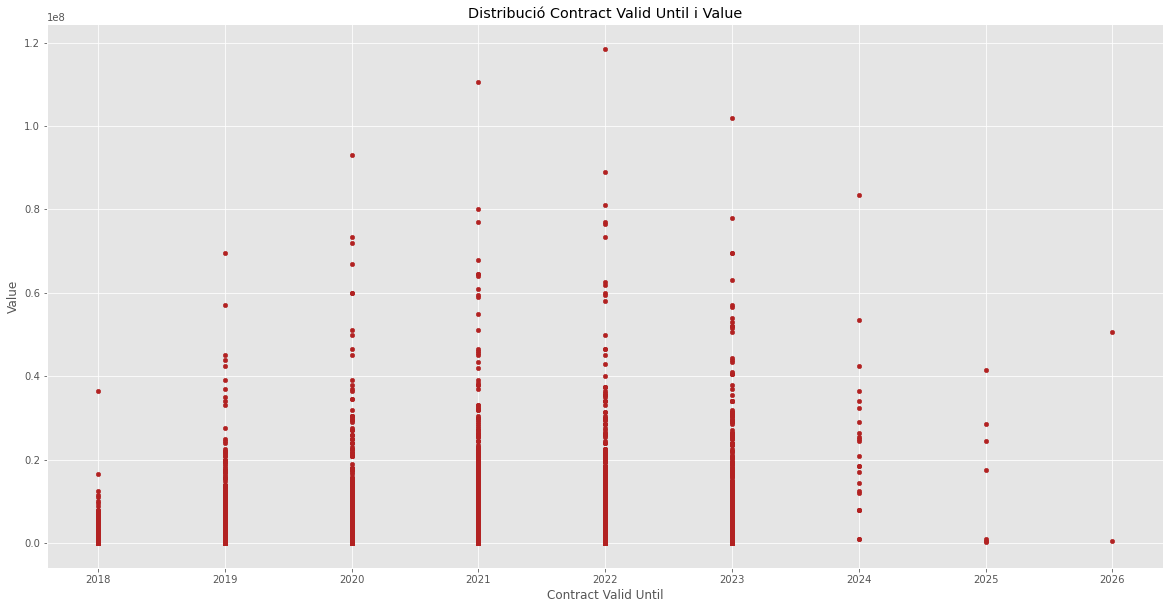

In [25]:
fig, ax = plt.subplots (figsize=(20,10))
df_aux.plot(x = 'Contract Valid Until',
           y = 'Value',
           c = 'firebrick',
           kind = "scatter",
           ax = ax
            )
ax.set_title ('Distribució Contract Valid Until i Value')

Veïm ja que ens queda per trasformar

In [26]:
df_aux.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Special                       int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Contract Valid Until          int64
Altaria                     float64
Pes                         float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     

``Nationality`` i ``Club`` són els darrers atributs que manquen

Ara, mitjançant sa funció ``get_dummies`` anam a tractar aquests dos atributs convertint dades categòriques tipus object a un format que se pugui entrenar.
Comencem per s'atribut ``Club`` com a tipus ''binari'' amb mètodes de codificació com per exemple ``get_dummies`` o ``OneHotEncoder``. Pel nostre model farem servir sa primera.

Al dataframe clb guarden tots els valors del ``Club`` a on pertany cada jugador (18159 elements)

Amb el mètode pop extreim i eliminam sa columna ``Club`` del dataframe.

Es dataframe final és resultat de concatenar es nostre ``df_aux`` i es dataframe resultant d'aplicar es ``get_dummies`` a ``Club``


Està clar que normalment, els jugadors més valorats (supòs que llevat de qualque excepció) solen ser de països "Clau" i de igual forma també els que hi pertanyen a certs ``Club``s.

Amb això vull dir que aquests dos atributs són bastant determinants a s'hora de entrenar es nostre model i com a tal se'ls ha de tenir en compte.

Veïm gràficament que passa amb ``Club``

### Representació gràfica per a justificar s'us de sa columna ``Club``



Text(0.5, 1.0, 'Distribució Club vs Value')

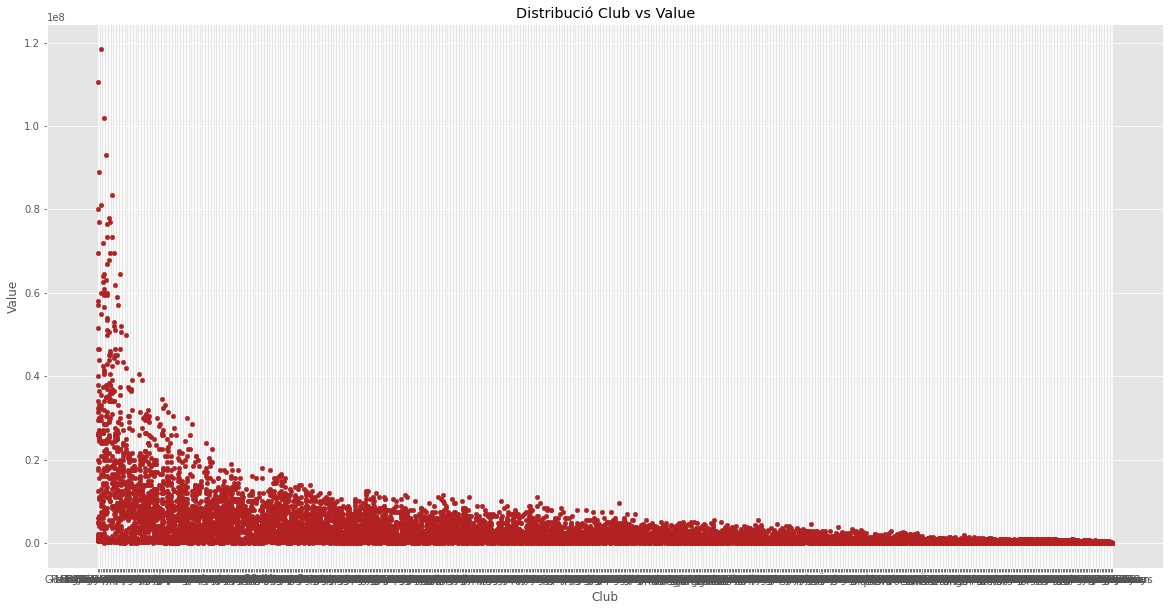

In [27]:
fig, ax = plt.subplots (figsize=(20,10))
df_aux.plot(x = 'Club',
           y = 'Value',
           c = 'firebrick',
           kind = "scatter",
           ax = ax
            )
ax.set_title ('Distribució Club vs Value')

In [28]:
clb = df_aux.pop("Club")

## 
df_aux = pd.concat([df_aux.reset_index(drop=True), pd.get_dummies(clb, prefix='clb').reset_index(drop=True)], axis=1, sort=False)
df_aux

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Donca

In [29]:
## número d'elements únics al dataframe clb


clb.nunique()

651

Per tant, el nostre dataframe ``df_aux``  ha crescut 651 columnes més. 

Sa columna ``Nationality`` sí que es rellevant. 
Està clar que normalment, els jugadors més valorats (supòs que llevat de qualque excepció) solen ser de països "Clau".

Idó farem el que hem fet abans amb Club però aplicat a ``Nationality``

### Representació gràfica per a justificar s'us de sa columna ``Nationality``

Sa gràfica deixa bastant més clar el que vull dir amb això de rel.levant. Poques explicacions fan falta.

Text(0.5, 1.0, 'Distribució Nationality vs Value')

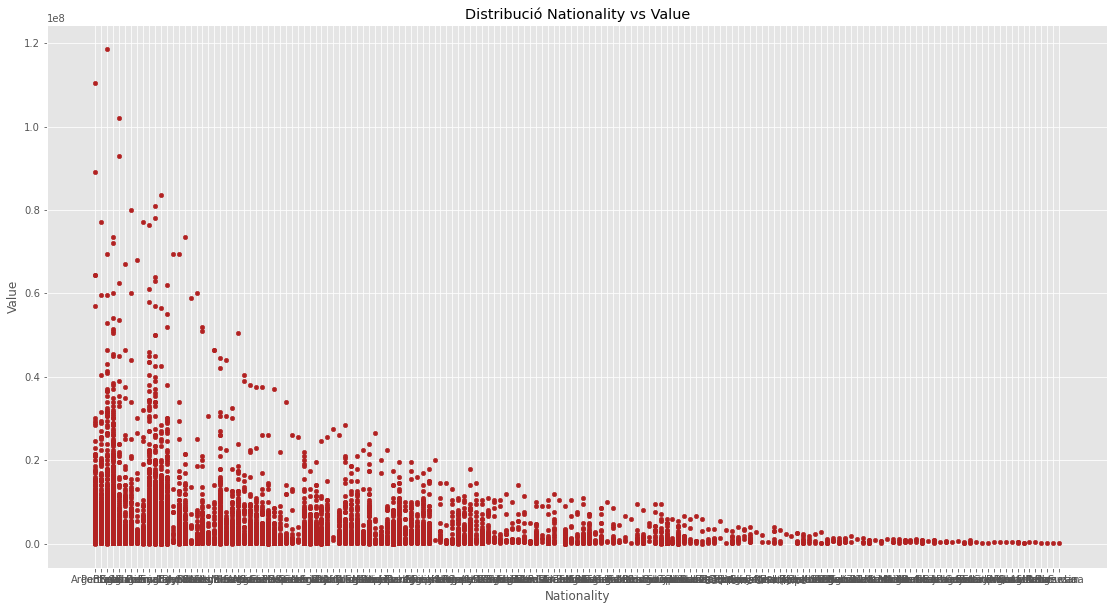

In [30]:
fig, ax = plt.subplots (figsize=(19,10))
df_aux.plot(x = 'Nationality',
           y = 'Value',
           c = 'firebrick',
           kind = "scatter",
           ax = ax
            )
ax.set_title ('Distribució Nationality vs Value')

In [31]:
ntnl = df_aux.pop("Nationality")

## 
df_aux = pd.concat([df_aux.reset_index(drop=True), pd.get_dummies(ntnl, prefix='ntnl').reset_index(drop=True)], axis=1, sort=False)
df_aux

,Name,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,

In [32]:
## número d'elements únics al dataframe clb

ntnl.nunique()

163

Veïm que sa nacionalitat ``Nationality`` a fet crèixer el nostre dataframe ``df_aux`` 163 columnes més.

# Extracció de s'etiqueta ``Value`` i ``Name``

Com ja sabem, sa nostra variable objectiu serà ``Value`` i per això la treim del nostre dataframe ``df_aux`` la guardarem com a ``val`` i serà sa nostra ``y`` del model per entrenar.

In [33]:
name = df_aux.pop("Name")
df_aux

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,clb_D

``Name`` no es un atribut que ens servesqui per res a s'entrenament però sí és important o és interessant saber es nom del jugador a qui hi pertanyen aquestes característiques, El treurem del nostre model, i ho guardarem a un array com a sèrie que li direm  ``name``

Abans de xepar completament el dataframe, guardaré tota sa informació a ``df_complet`` pel cas que hagués de fer posteriors operacions amb es ``dataset`` complet

In [34]:

df_complet = df_aux.copy()
val = df_aux.pop("Value")

## Com a resultat veïm que ens ha desaparegut sa columna 'Value'
df_aux


,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Altaria,Pes,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,clb_Dundalk

Abans de xepar i continuar veïm un poc de sa nostra dada objectiu ``val`` certa informació que podria ser rellevant

In [35]:

print("tipus de variable què és val: " , type(val))
print(f"media:{val.mean()}" )
print(f"desviació:{val.std()}")
print(f"variança:{val.var()}")


tipus de variable què és val:  <class 'pandas.core.series.Series'>
media:2448628.7532090633
desviació:5631804.209164068
variança:31717218650358.113


I comprovam com ens ha quedat preparat ses nostres dades per s'entrenament ``train``

In [36]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Columns: 859 entries, Age to ntnl_Zimbabwe
dtypes: float64(40), int64(5), uint8(814)
memory usage: 20.1 MB


# Split de ses dades i creació del model de Regressió Lineal

Xepam es nostre dataframe ``df_aux`` 67% X_train (el que entrenam) 33% X_test (damunt el que farem ses proves un pic entrenat)

Per sa predicció tenim a ``val`` es ``Value`` dels nostres jugadors. Igualment 67% y_train i 33% y_test (resultat de sa predicció)

In [37]:
# Divisió de ses dades entre train i test
atributs = df_aux
objectiu = val

X_train, X_test, y_train, y_test = train_test_split(atributs,
                                                    objectiu,
                                                    test_size = 0.33,
                                                    random_state = 42)

# Creació del model
# ==============================================================================
model = LinearRegression()

Dels 17918 files de jugadors ens quedam amb:
  
12005 dades per entrenar (66,99%) ``X_train``, ``y_train``

5913 dades per provar (33%) ``X_test``, ``y_test``


Creació del model (Regressió linial) i entrenament

In [38]:
model.fit(X_train,y_train);



# Validació

A continuació, vaig a fer un resampling de ses meues dades d'entrenament. Sa justificació del perquè ho vaig trobar a un article de cienciadedatos.net i hi vaig trobar molt encertada

Si bé després d'haver fet tot això no he trobat sa manera d'aprofitar-me d'ella (pel cas de RegressióLineal) perque no sé com ajustar sa meua predicció als casos més òptims de sa validació creuada, és molt representatiu emprar-lo com patró a seguir si hagués d'entrenar altres tipus de models.


Literalment:
    
"La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha "visto" antes. 
El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha "visto". 
Si bien estos errores son útiles para entender cómo está aprendiendo el modelo (estudio de residuos), no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones (el error de entrenamiento suele ser demasiado optimista). 
Para conseguir una estimación más certera, y antes de recurrir al conjunto de test, se pueden emplear estrategias de validación basadas en resampling.""

In [39]:
# Validació creuada repetida amb múltiples mètriques
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

pd.options.display.float_format = '{:.4f}'.format

## 5 splits amb 2 repeticions cada una d'elles

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
cv_scores = cross_validate(estimator = model,
                           X = X_train,
                           y = y_train,
                           scoring = ('r2','neg_root_mean_squared_error'),
                           cv = cv,
                           return_train_score = True)

# Es converteix el diccionari a dataframe per a facilitar sa visualització
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.2730,0.0469,0.8023,0.8520,-2389292.4201,-2164691.7296
1,1.2990,0.0469,0.8389,0.8438,-2461792.1589,-2145673.8860
2,1.3746,0.0480,0.8296,0.8464,-2491256.4334,-2138388.7969
3,1.2515,0.0469,0.8354,0.8450,-2270571.8600,-2194036.5535
4,1.2790,0.0480,0.7853,0.8518,-2136540.7163,-2230031.2407
5,1.3253,0.0471,0.8076,0.8528,-2676091.0721,-2086648.7942
6,1.3396,0.0469,0.8109,0.8497,-2315706.8089,-2185743.6803
7,1.2718,0.0329,0.8524,0.8406,-2229660.2305,-2203619.3276
8,1.2953,0.0469,0.7941,0.8506,-2107756.0872,-2236578.8030
9,1.3267,0.0469,0.8283,0.8463,-2437981.7234,-2155264.4595


In [40]:
    print("\n\nVisualització de Resultats estadístic de sa informació obtenguda \n\n")
    #print("\nScores:", scores)
    print("\nMitja:", cv_scores.mean())
    print("\nDesviació standard:", cv_scores.std())



Visualització de Resultats estadístic de sa informació obtenguda 



Mitja: fit_time                                   1.3036
score_time                                 0.0457
test_r2                                    0.8185
train_r2                                   0.8479
test_neg_root_mean_squared_error    -2351664.9511
train_neg_root_mean_squared_error   -2174067.7271
dtype: float64

Desviació standard: fit_time                                 0.0376
score_time                               0.0045
test_r2                                  0.0216
train_r2                                 0.0041
test_neg_root_mean_squared_error    174565.0795
train_neg_root_mean_squared_error    45473.6392
dtype: float64


# 'Pre-predicció' i estudi dels residus

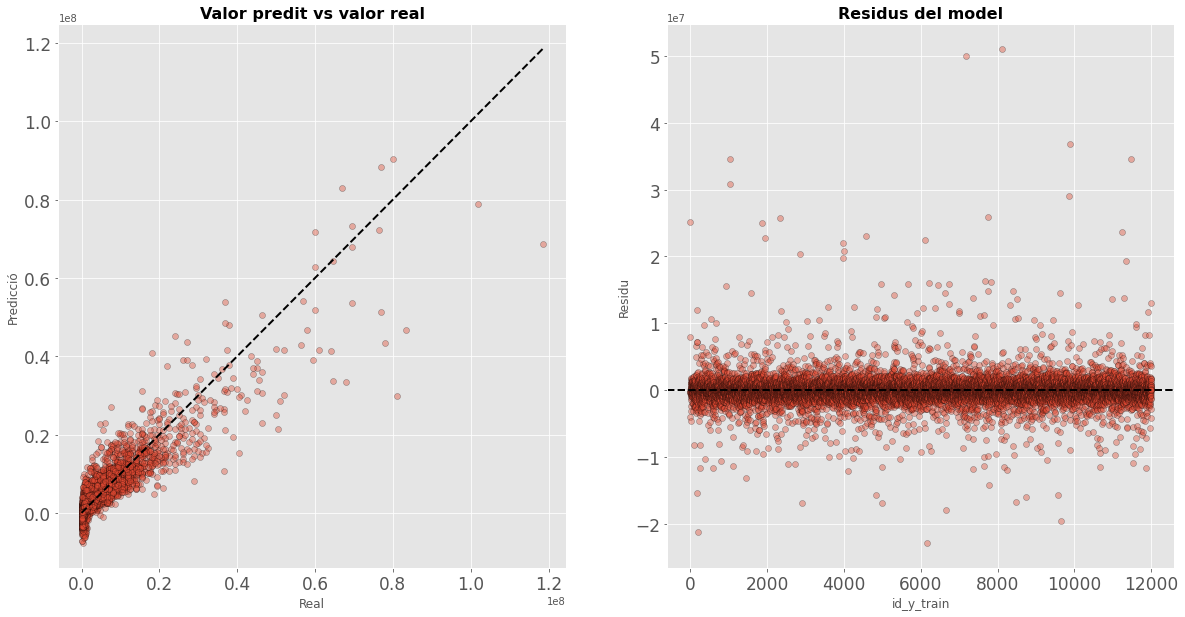

In [41]:
# Diagnosi d'errors (residus) de ses prediccions de validació creuada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Validació creuada
# ==============================================================================
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_prediccions = cross_val_predict(
                    estimator = model,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gràfics
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].scatter(y_train, cv_prediccions, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0].set_title('Valor predit vs valor real', fontsize = 16, fontweight = "bold")
axes[0].set_xlabel('Real')
axes[0].set_ylabel('Predicció')
axes[0].tick_params(labelsize = 17)

axes[1].scatter(list(range(len(y_train))), y_train - cv_prediccions,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residus del model', fontsize = 16, fontweight = "bold")
axes[1].set_xlabel('id_y_train')
axes[1].set_ylabel('Residu')
axes[1].tick_params(labelsize = 17)



``id_y_train`` a sa gràfica de residus del model són els 12005 exemples del nostre dataset d'entrenament

Ara sí, feïm aplicam sa predicció a sa variable preds  ``.predict()``

In [42]:
preds = model.predict(X_test)

# Representació gràfica de sa predicció ``preds`` vs es valor real ``y_test`` i distribució dels residus ``y_test-preds``

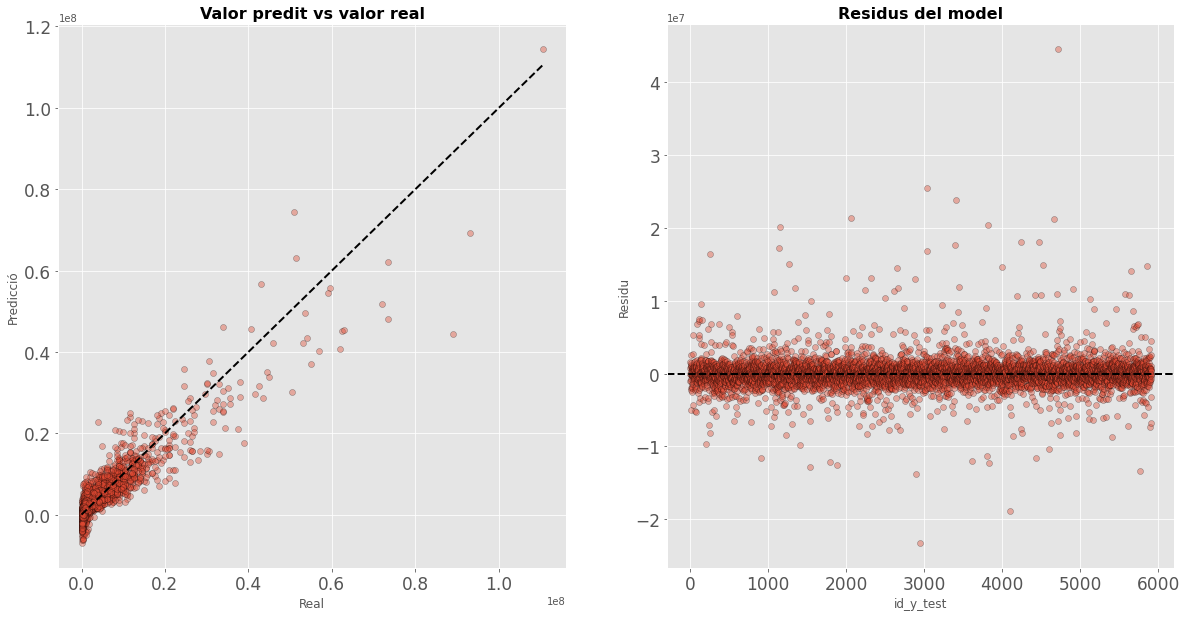

In [43]:
# Gràfics dels resultats obtinguts
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].scatter(y_test, preds, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0].set_title('Valor predit vs valor real', fontsize = 16, fontweight = "bold")
axes[0].set_xlabel('Real')
axes[0].set_ylabel('Predicció')
axes[0].tick_params(labelsize = 17)

axes[1].scatter(list(range(len(y_test))), y_test - preds,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residus del model', fontsize = 16, fontweight = "bold")
axes[1].set_xlabel('id_y_test')
axes[1].set_ylabel('Residu')
axes[1].tick_params(labelsize = 17)



``id_y_test`` a sa gràfica de residus del model són els 5913 exemples del nostre dataset per provar

# Interpretació de ses dades

# Mètriques per a sa regressió

En un model de regressió s'han de superar uns resultats mínims, en aquest cas ha de superar sa mitja

In [44]:
print('Estadístic R2: %.3f' % r2_score(y_test, preds))
print("Root Mean Squared Error: %.3f" % mean_squared_error(y_test, preds, squared = False)) # if False returns RMSE value.
print("Sa mitja del conjunt de test es: %.3f" % y_test.mean())
print("Sa mitja de prediccions es: %.3f" % preds.mean())
print("\n\n Sa mitja de sa nostra variable val ('original'): %.3f" % val.mean())



Estadístic R2: 0.851
Root Mean Squared Error: 2214324.089
Sa mitja del conjunt de test es: 2450941.147
Sa mitja de prediccions es: 2430092.153


 Sa mitja de sa nostra variable val ('original'): 2448628.753


Sa mètrica ``R2`` ens torna un estadístic del 85.1% (una dada realment bona)
Sa mètrica ``RMSE`` ens torna un valor de 2214324.089 molt aprop de ses mitjes de ``y_test`` i sa predicció ``preds``

Com a dada informativa (que ja varem mostrar abans de fer split) deix sa mitja de sa variable objectiu al complet ``train`` + ``test``

# Una petita mostra de ses dades obtingudes

In [45]:
# Se crea un dataframe con las predicciones y el valor real
pd.options.display.float_format = '{:.0f}'.format
df_prediccions = pd.DataFrame({'Value' : y_test, 'predicció' : preds})
df_prediccions.tail(50)

,Value,predicció
10643,925000,1786504
7971,850000,509092
8149,1000000,1332592
13834,325000,2048697
4341,725000,-323102
3017,4100000,3063161
16642,170000,374359
6805,1300000,5914487
4075,2500000,2224231
15179,220000,255277


# Conclusions
Com a epíleg podem dir que el nostre model es comporta bé quant ses dades són molt grans. Sa predicció i els valors reals s'assemblen molt.

Això és degut a sa diferència tant grossa que existeix els preus del jugadors. Els que cobren molt solen ser quantitats desorbitades i el que cobren poc són molt baixes en comparació.
Aquestes diferències tan descompensades fa que per quantitats petites s'error sigui molt gran. Aquests són els valors atípics o ``outliers``. 

Sa representació gràfica de sa cel.la 43 (Residus del model) ens mostra clarament s'existència d'aquestes dades extremes i aquest dataframe d'aquí d'adalt (cel.la 45) ``df_prediccions`` ho fa numèricament.

Com a una possible millora per reforçar es nostre model podriem estudiar quins podrien ser aquests ``outliers`` que perturben es model i eliminar-los.